In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/Users/thebobs/Downloads/analyst_ratings_processed.csv",parse_dates=True)

In [3]:
df.columns

Index(['Unnamed: 0', 'title', 'date', 'stock'], dtype='object')

In [19]:
grouped=df.groupby(['stock','date'])['title'].count()

In [45]:
grouped.groupby(level=0).sum().sort_values()[-20:]

stock
BBRY    2570
WFC     2612
HD      2617
FDX     2630
ORCL    2695
KO      2785
BABA    2820
QCOM    2915
JNJ     2927
DAL     2929
VZ      2937
GILD    2969
NFLX    3009
EBAY    3021
M       3078
QQQ     3100
NVDA    3133
MU      3144
MS      3242
MRK     3334
Name: title, dtype: int64

In [55]:
import yfinance as yf

# List of tickers
tickers = ['VZ', 'GILD', 'DAL', 'EBAY', 'M', 'QQQ', 'NVDA', 'MU', 'MS', 'MRK']

# Define the start and end dates for the historical data
start_date = '2012-01-01'
end_date = '2020-06-11'

# Download historical data for each ticker
historical_data = yf.download(tickers, start=start_date, end=end_date)

# Print the historical data
historical_data.head()


[*********************100%***********************]  10 of 10 completed


Adj Close                                                         \
                 DAL       EBAY       GILD          M        MRK         MS   
Date                                                                          
2012-01-03  7.106645  12.224873  15.700218  21.264025  25.026934  12.316113   
2012-01-04  7.080129  11.764586  15.760237  21.244507  25.053062  12.208876   
2012-01-05  7.362979  11.979126  15.947767  22.070858  25.314438  12.469297   
2012-01-06  7.354143  11.947920  16.045280  22.487295  25.138014  12.178242   
2012-01-09  7.318785  11.901112  16.026527  22.422218  25.085732  12.408020   

                                                      ...    Volume            \
                  MU      NVDA        QQQ         VZ  ...       DAL      EBAY   
Date                                                  ...                       
2012-01-03  6.654495  3.220165  51.060955  22.387232  ...   7093200  25156850   
2012-01-04  6.880903  3.256862  51.276302  22.094210  ...   7412900  78181092   
2012-01-05  7.048251  3.373835  51.698078  21.942076  ...  10509800  31470358   
2012-01-06  7.087627  3.334843  51.877567  21.879286  ...   6683300  17417506   
2012-01-09  7.176222  3.334843  51.707058  21.902111  ...   9015700  18989230   

                                                                        \
                GILD         M       MRK        MS        MU      NVDA   
Date                                                                     
2012-01-03  19564000   7095600  18100427  25777400  42035300  46804400   
2012-01-04  16236000  10528100  14374682  20699600  43038500  34737200   
2012-01-05  18431800  14087400  21995005  30615100  53469800  56354800   
2012-01-06  15542000  10806000  17530630  21677700  33006500  53325200   
2012-01-09  16801200   6362000  14574431  19102900  28692200  50824400   

                                
                 QQQ        VZ  
Date                            
2012-01-03  39514100  21964200  
2012-01-04  29403400  28273100  
2012-01-05  41260600  19937700  
2012-01-06  46325200  22327200  
2012-01-09  39195500  13966500  

[5 rows x 60 columns]

In [143]:

# List of tickers
tickers = ['^SPX']

# Define the start and end dates for the historical data
start_date = '2005-01-01'
end_date = '2013-12-31'

# Download historical data for each ticker
historical_data = yf.download(tickers, start=start_date, end=end_date)

# Print the historical data



[*********************100%***********************]  1 of 1 completed


In [145]:
historical_data[historical_data['Volume']!=0]['Adj Close'].to_csv("/Users/thebobs/Downloads/spx_2006_2013.csv")

In [58]:
for i in historical_data['Adj Close'].columns:
    historical_data['Adj Close'][i].to_csv(f"/Users/thebobs/Downloads/w266_data/{i}_price.csv")

<AxesSubplot: xlabel='Date'>

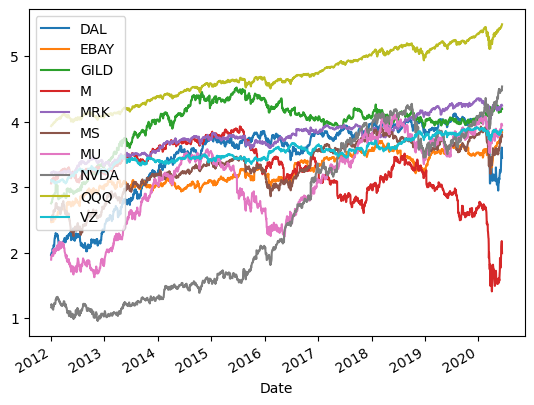

In [57]:
np.log(historical_data['Adj Close']).plot()

In [147]:
p=historical_data[historical_data['Volume']!=0]['Adj Close']

In [148]:
p=np.log(p)

<AxesSubplot: xlabel='Date'>

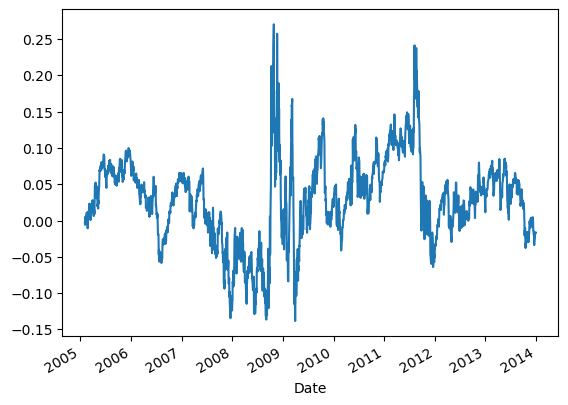

In [151]:
(np.sign(p.diff(20)).shift(1)*p.diff()).cumsum().plot()

In [81]:
df_long=df[df['stock'].isin(['VZ', 'GILD', 'DAL', 'EBAY', 'M', 'QQQ', 'NVDA', 'MU', 'MS', 'MRK'])]

In [96]:
for i in ['VZ', 'GILD', 'DAL', 'EBAY', 'M', 'QQQ', 'NVDA', 'MU', 'MS', 'MRK']:
    df_long[df_long['stock']==i][['date','title']].sort_values('date').to_csv(f"/Users/thebobs/Downloads/w266_data/{i}_news.csv",index=False)

In [93]:
df_long['date']=pd.to_datetime(df_long['date'],utc=True).dt.date

/var/folders/bz/zcw9zmyd15x0qhwt6r0v3tqc0000gp/T/ipykernel_95203/4173263749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['date']=pd.to_datetime(df_long['date'],utc=True).dt.date


In [54]:
df_long.groupby(['date','stock'])['title'].count().unstack().fillna(0).cumsum().tail()

stock,DAL,EBAY,GILD,M,MRK,MS,MU,NVDA,QQQ,VZ
date,,,,,,,,,,
2020-06-11 10:05:00-04:00,2929.0,3021.0,2969.0,3077.0,3333.0,3241.0,3144.0,3133.0,3100.0,2936.0
2020-06-11 10:16:00-04:00,2929.0,3021.0,2969.0,3077.0,3333.0,3241.0,3144.0,3133.0,3100.0,2937.0
2020-06-11 10:22:00-04:00,2929.0,3021.0,2969.0,3077.0,3334.0,3241.0,3144.0,3133.0,3100.0,2937.0
2020-06-11 10:34:00-04:00,2929.0,3021.0,2969.0,3078.0,3334.0,3241.0,3144.0,3133.0,3100.0,2937.0
2020-06-11 11:03:00-04:00,2929.0,3021.0,2969.0,3078.0,3334.0,3242.0,3144.0,3133.0,3100.0,2937.0


In [97]:
import os

In [98]:
os.chdir("/Users/thebobs/Downloads/financial-news-dataset-master/ReutersNews106521")

In [99]:
dt=os.listdir()[0]

In [102]:
os.listdir(dt)[0]

'us-energy-hitachi-ge-idUSTKB00256820061113'

In [126]:
with open('/Users/thebobs/Downloads/financial-news-dataset-master/ReutersNews106521/20131120/us-markets-stocks-idUSBRE9AA0IH20131120') as file:
    print(file.readlines(7))


['-- Dow, S&P retreat for second day; Best Buy weighs\n']


In [118]:
txt[7]

' NEW YORK  (Reuters) - U.S. stocks fell on Tuesday, with the Dow and the S&P 500 retreating further from milestone levels, led by a slide in Best Buy ( BBY.N ) after a disappointing outlook. \n'

In [120]:
file.readline(7)

ValueError: I/O operation on closed file.

In [131]:
news=[]
for dt in os.listdir():
    if not dt.startswith("."):
        for n in os.listdir(dt):
            try:
                with open(dt+"/"+n) as f:
                    lines=f.readlines()
                    news.append((dt,lines[0][3:-1],lines[7].strip()))
            except:
                pass

In [130]:
news[0][2]

'TOKYO  (Reuters) - Hitachi Ltd. ( 6501.T ) said on Monday it has agreed with General Electric Co. ( GE.N ) to expand their global alliance in the nuclear power business, aiming to strengthen their position in a growing market.'

In [132]:
df_news=pd.DataFrame(news,columns=['date','title','summary'])

In [135]:
df_news.to_csv('/Users/thebobs/Downloads/reuters_news_2006_2013.csv',index=False)